In \[1\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeRegressor

In \[2\]:

    data=pd.read_csv("mtcars.csv")

In \[3\]:

    data.head()

Out\[3\]:

|     | model             | mpg  | cyl | disp  | hp  | drat | wt    | qsec  | vs  | am  | gear | carb |
|-----|-------------------|------|-----|-------|-----|------|-------|-------|-----|-----|------|------|
| 0   | Mazda RX4         | 21.0 | 6   | 160.0 | 110 | 3.90 | 2.620 | 16.46 | 0   | 1   | 4    | 4    |
| 1   | Mazda RX4 Wag     | 21.0 | 6   | 160.0 | 110 | 3.90 | 2.875 | 17.02 | 0   | 1   | 4    | 4    |
| 2   | Datsun 710        | 22.8 | 4   | 108.0 | 93  | 3.85 | 2.320 | 18.61 | 1   | 1   | 4    | 1    |
| 3   | Hornet 4 Drive    | 21.4 | 6   | 258.0 | 110 | 3.08 | 3.215 | 19.44 | 1   | 0   | 3    | 1    |
| 4   | Hornet Sportabout | 18.7 | 8   | 360.0 | 175 | 3.15 | 3.440 | 17.02 | 0   | 0   | 3    | 2    |

In \[4\]:

    data.tail()

Out\[4\]:

|     | model          | mpg  | cyl | disp  | hp  | drat | wt    | qsec | vs  | am  | gear | carb |
|-----|----------------|------|-----|-------|-----|------|-------|------|-----|-----|------|------|
| 27  | Lotus Europa   | 30.4 | 4   | 95.1  | 113 | 3.77 | 1.513 | 16.9 | 1   | 1   | 5    | 2    |
| 28  | Ford Pantera L | 15.8 | 8   | 351.0 | 264 | 4.22 | 3.170 | 14.5 | 0   | 1   | 5    | 4    |
| 29  | Ferrari Dino   | 19.7 | 6   | 145.0 | 175 | 3.62 | 2.770 | 15.5 | 0   | 1   | 5    | 6    |
| 30  | Maserati Bora  | 15.0 | 8   | 301.0 | 335 | 3.54 | 3.570 | 14.6 | 0   | 1   | 5    | 8    |
| 31  | Volvo 142E     | 21.4 | 4   | 121.0 | 109 | 4.11 | 2.780 | 18.6 | 1   | 1   | 4    | 2    |

In \[5\]:

    data.info

Out\[5\]:

    <bound method DataFrame.info of                   model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
    0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
    1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
    2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
    3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
    4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
    5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
    6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
    7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
    8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
    9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
    10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
    11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.40   0   0   
    12           Merc 450SL  17.3    8  275.8  180  3.07  3.730  17.60   0   0   
    13          Merc 450SLC  15.2    8  275.8  180  3.07  3.780  18.00   0   0   
    14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
    15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   
    16    Chrysler Imperial  14.7    8  440.0  230  3.23  5.345  17.42   0   0   
    17             Fiat 128  32.4    4   78.7   66  4.08  2.200  19.47   1   1   
    18          Honda Civic  30.4    4   75.7   52  4.93  1.615  18.52   1   1   
    19       Toyota Corolla  33.9    4   71.1   65  4.22  1.835  19.90   1   1   
    20        Toyota Corona  21.5    4  120.1   97  3.70  2.465  20.01   1   0   
    21     Dodge Challenger  15.5    8  318.0  150  2.76  3.520  16.87   0   0   
    22          AMC Javelin  15.2    8  304.0  150  3.15  3.435  17.30   0   0   
    23           Camaro Z28  13.3    8  350.0  245  3.73  3.840  15.41   0   0   
    24     Pontiac Firebird  19.2    8  400.0  175  3.08  3.845  17.05   0   0   
    25            Fiat X1-9  27.3    4   79.0   66  4.08  1.935  18.90   1   1   
    26        Porsche 914-2  26.0    4  120.3   91  4.43  2.140  16.70   0   1   
    27         Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.90   1   1   
    28       Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.50   0   1   
    29         Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.50   0   1   
    30        Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.60   0   1   
    31           Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.60   1   1   

        gear  carb  
    0      4     4  
    1      4     4  
    2      4     1  
    3      3     1  
    4      3     2  
    5      3     1  
    6      3     4  
    7      4     2  
    8      4     2  
    9      4     4  
    10     4     4  
    11     3     3  
    12     3     3  
    13     3     3  
    14     3     4  
    15     3     4  
    16     3     4  
    17     4     1  
    18     4     2  
    19     4     1  
    20     3     1  
    21     3     2  
    22     3     2  
    23     3     4  
    24     3     2  
    25     4     1  
    26     5     2  
    27     5     2  
    28     5     4  
    29     5     6  
    30     5     8  
    31     4     2  >

In \[6\]:

    data.describe

Out\[6\]:

    <bound method NDFrame.describe of                   model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
    0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
    1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
    2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
    3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
    4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
    5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
    6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
    7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
    8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
    9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
    10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
    11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.40   0   0   
    12           Merc 450SL  17.3    8  275.8  180  3.07  3.730  17.60   0   0   
    13          Merc 450SLC  15.2    8  275.8  180  3.07  3.780  18.00   0   0   
    14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
    15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   
    16    Chrysler Imperial  14.7    8  440.0  230  3.23  5.345  17.42   0   0   
    17             Fiat 128  32.4    4   78.7   66  4.08  2.200  19.47   1   1   
    18          Honda Civic  30.4    4   75.7   52  4.93  1.615  18.52   1   1   
    19       Toyota Corolla  33.9    4   71.1   65  4.22  1.835  19.90   1   1   
    20        Toyota Corona  21.5    4  120.1   97  3.70  2.465  20.01   1   0   
    21     Dodge Challenger  15.5    8  318.0  150  2.76  3.520  16.87   0   0   
    22          AMC Javelin  15.2    8  304.0  150  3.15  3.435  17.30   0   0   
    23           Camaro Z28  13.3    8  350.0  245  3.73  3.840  15.41   0   0   
    24     Pontiac Firebird  19.2    8  400.0  175  3.08  3.845  17.05   0   0   
    25            Fiat X1-9  27.3    4   79.0   66  4.08  1.935  18.90   1   1   
    26        Porsche 914-2  26.0    4  120.3   91  4.43  2.140  16.70   0   1   
    27         Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.90   1   1   
    28       Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.50   0   1   
    29         Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.50   0   1   
    30        Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.60   0   1   
    31           Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.60   1   1   

        gear  carb  
    0      4     4  
    1      4     4  
    2      4     1  
    3      3     1  
    4      3     2  
    5      3     1  
    6      3     4  
    7      4     2  
    8      4     2  
    9      4     4  
    10     4     4  
    11     3     3  
    12     3     3  
    13     3     3  
    14     3     4  
    15     3     4  
    16     3     4  
    17     4     1  
    18     4     2  
    19     4     1  
    20     3     1  
    21     3     2  
    22     3     2  
    23     3     4  
    24     3     2  
    25     4     1  
    26     5     2  
    27     5     2  
    28     5     4  
    29     5     6  
    30     5     8  
    31     4     2  >

In \[7\]:

    data.shape

Out\[7\]:

    (32, 12)

In \[8\]:

    data.size

Out\[8\]:

    384

In \[9\]:

    data.isnull()

Out\[9\]:

|     | model | mpg   | cyl   | disp  | hp    | drat  | wt    | qsec  | vs    | am    | gear  | carb  |
|-----|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| 0   | False | False | False | False | False | False | False | False | False | False | False | False |
| 1   | False | False | False | False | False | False | False | False | False | False | False | False |
| 2   | False | False | False | False | False | False | False | False | False | False | False | False |
| 3   | False | False | False | False | False | False | False | False | False | False | False | False |
| 4   | False | False | False | False | False | False | False | False | False | False | False | False |
| 5   | False | False | False | False | False | False | False | False | False | False | False | False |
| 6   | False | False | False | False | False | False | False | False | False | False | False | False |
| 7   | False | False | False | False | False | False | False | False | False | False | False | False |
| 8   | False | False | False | False | False | False | False | False | False | False | False | False |
| 9   | False | False | False | False | False | False | False | False | False | False | False | False |
| 10  | False | False | False | False | False | False | False | False | False | False | False | False |
| 11  | False | False | False | False | False | False | False | False | False | False | False | False |
| 12  | False | False | False | False | False | False | False | False | False | False | False | False |
| 13  | False | False | False | False | False | False | False | False | False | False | False | False |
| 14  | False | False | False | False | False | False | False | False | False | False | False | False |
| 15  | False | False | False | False | False | False | False | False | False | False | False | False |
| 16  | False | False | False | False | False | False | False | False | False | False | False | False |
| 17  | False | False | False | False | False | False | False | False | False | False | False | False |
| 18  | False | False | False | False | False | False | False | False | False | False | False | False |
| 19  | False | False | False | False | False | False | False | False | False | False | False | False |
| 20  | False | False | False | False | False | False | False | False | False | False | False | False |
| 21  | False | False | False | False | False | False | False | False | False | False | False | False |
| 22  | False | False | False | False | False | False | False | False | False | False | False | False |
| 23  | False | False | False | False | False | False | False | False | False | False | False | False |
| 24  | False | False | False | False | False | False | False | False | False | False | False | False |
| 25  | False | False | False | False | False | False | False | False | False | False | False | False |
| 26  | False | False | False | False | False | False | False | False | False | False | False | False |
| 27  | False | False | False | False | False | False | False | False | False | False | False | False |
| 28  | False | False | False | False | False | False | False | False | False | False | False | False |
| 29  | False | False | False | False | False | False | False | False | False | False | False | False |
| 30  | False | False | False | False | False | False | False | False | False | False | False | False |
| 31  | False | False | False | False | False | False | False | False | False | False | False | False |

In \[10\]:

    data.isnull().sum()

Out\[10\]:

    model    0
    mpg      0
    cyl      0
    disp     0
    hp       0
    drat     0
    wt       0
    qsec     0
    vs       0
    am       0
    gear     0
    carb     0
    dtype: int64

In \[12\]:

    data.model.unique()

Out\[12\]:

    array(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
           'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D',
           'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL',
           'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental',
           'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla',
           'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28',
           'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa',
           'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
          dtype=object)

In \[13\]:

    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 10))
    sns.distplot(data.drat)
    plt.show()

    C:\Users\Amrendra Mishra\AppData\Local\Temp\ipykernel_2092\1962403192.py:3: UserWarning: 

    `distplot` is a deprecated function and will be removed in seaborn v0.14.0.

    Please adapt your code to use either `displot` (a figure-level function with
    similar flexibility) or `histplot` (an axes-level function for histograms).

    For a guide to updating your code to use the new functions, please see
    https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

      sns.distplot(data.drat)

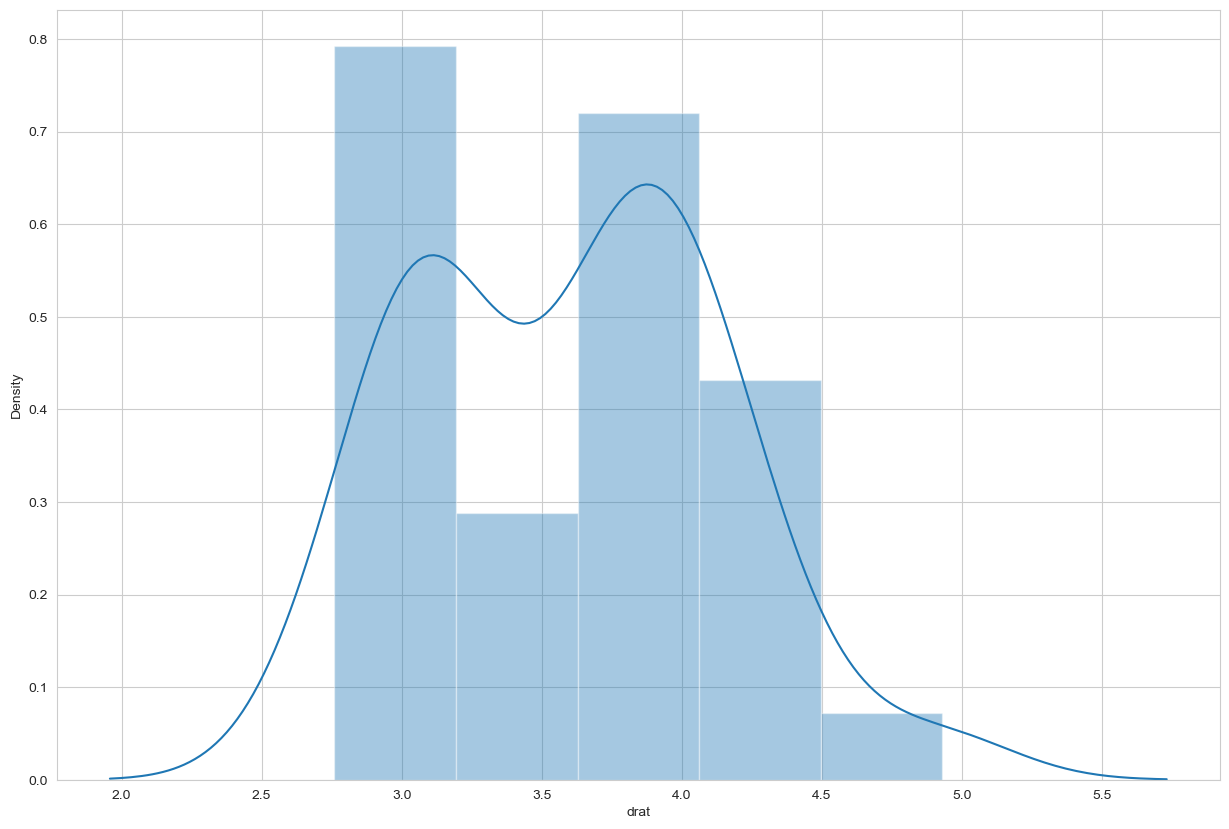

In \[26\]:

    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error

In \[27\]:

    # Load the dataset
    data = pd.read_csv("mtcars.csv")

In \[ \]:

    # performing train - test split & intializing the  regressior

In \[28\]:

    # Separate features and target variable
    X = data.drop('mpg', axis=1)
    y = data['mpg']

In \[29\]:

    X

Out\[29\]:

|     | model               | cyl | disp  | hp  | drat | wt    | qsec  | vs  | am  | gear | carb |
|-----|---------------------|-----|-------|-----|------|-------|-------|-----|-----|------|------|
| 0   | Mazda RX4           | 6   | 160.0 | 110 | 3.90 | 2.620 | 16.46 | 0   | 1   | 4    | 4    |
| 1   | Mazda RX4 Wag       | 6   | 160.0 | 110 | 3.90 | 2.875 | 17.02 | 0   | 1   | 4    | 4    |
| 2   | Datsun 710          | 4   | 108.0 | 93  | 3.85 | 2.320 | 18.61 | 1   | 1   | 4    | 1    |
| 3   | Hornet 4 Drive      | 6   | 258.0 | 110 | 3.08 | 3.215 | 19.44 | 1   | 0   | 3    | 1    |
| 4   | Hornet Sportabout   | 8   | 360.0 | 175 | 3.15 | 3.440 | 17.02 | 0   | 0   | 3    | 2    |
| 5   | Valiant             | 6   | 225.0 | 105 | 2.76 | 3.460 | 20.22 | 1   | 0   | 3    | 1    |
| 6   | Duster 360          | 8   | 360.0 | 245 | 3.21 | 3.570 | 15.84 | 0   | 0   | 3    | 4    |
| 7   | Merc 240D           | 4   | 146.7 | 62  | 3.69 | 3.190 | 20.00 | 1   | 0   | 4    | 2    |
| 8   | Merc 230            | 4   | 140.8 | 95  | 3.92 | 3.150 | 22.90 | 1   | 0   | 4    | 2    |
| 9   | Merc 280            | 6   | 167.6 | 123 | 3.92 | 3.440 | 18.30 | 1   | 0   | 4    | 4    |
| 10  | Merc 280C           | 6   | 167.6 | 123 | 3.92 | 3.440 | 18.90 | 1   | 0   | 4    | 4    |
| 11  | Merc 450SE          | 8   | 275.8 | 180 | 3.07 | 4.070 | 17.40 | 0   | 0   | 3    | 3    |
| 12  | Merc 450SL          | 8   | 275.8 | 180 | 3.07 | 3.730 | 17.60 | 0   | 0   | 3    | 3    |
| 13  | Merc 450SLC         | 8   | 275.8 | 180 | 3.07 | 3.780 | 18.00 | 0   | 0   | 3    | 3    |
| 14  | Cadillac Fleetwood  | 8   | 472.0 | 205 | 2.93 | 5.250 | 17.98 | 0   | 0   | 3    | 4    |
| 15  | Lincoln Continental | 8   | 460.0 | 215 | 3.00 | 5.424 | 17.82 | 0   | 0   | 3    | 4    |
| 16  | Chrysler Imperial   | 8   | 440.0 | 230 | 3.23 | 5.345 | 17.42 | 0   | 0   | 3    | 4    |
| 17  | Fiat 128            | 4   | 78.7  | 66  | 4.08 | 2.200 | 19.47 | 1   | 1   | 4    | 1    |
| 18  | Honda Civic         | 4   | 75.7  | 52  | 4.93 | 1.615 | 18.52 | 1   | 1   | 4    | 2    |
| 19  | Toyota Corolla      | 4   | 71.1  | 65  | 4.22 | 1.835 | 19.90 | 1   | 1   | 4    | 1    |
| 20  | Toyota Corona       | 4   | 120.1 | 97  | 3.70 | 2.465 | 20.01 | 1   | 0   | 3    | 1    |
| 21  | Dodge Challenger    | 8   | 318.0 | 150 | 2.76 | 3.520 | 16.87 | 0   | 0   | 3    | 2    |
| 22  | AMC Javelin         | 8   | 304.0 | 150 | 3.15 | 3.435 | 17.30 | 0   | 0   | 3    | 2    |
| 23  | Camaro Z28          | 8   | 350.0 | 245 | 3.73 | 3.840 | 15.41 | 0   | 0   | 3    | 4    |
| 24  | Pontiac Firebird    | 8   | 400.0 | 175 | 3.08 | 3.845 | 17.05 | 0   | 0   | 3    | 2    |
| 25  | Fiat X1-9           | 4   | 79.0  | 66  | 4.08 | 1.935 | 18.90 | 1   | 1   | 4    | 1    |
| 26  | Porsche 914-2       | 4   | 120.3 | 91  | 4.43 | 2.140 | 16.70 | 0   | 1   | 5    | 2    |
| 27  | Lotus Europa        | 4   | 95.1  | 113 | 3.77 | 1.513 | 16.90 | 1   | 1   | 5    | 2    |
| 28  | Ford Pantera L      | 8   | 351.0 | 264 | 4.22 | 3.170 | 14.50 | 0   | 1   | 5    | 4    |
| 29  | Ferrari Dino        | 6   | 145.0 | 175 | 3.62 | 2.770 | 15.50 | 0   | 1   | 5    | 6    |
| 30  | Maserati Bora       | 8   | 301.0 | 335 | 3.54 | 3.570 | 14.60 | 0   | 1   | 5    | 8    |
| 31  | Volvo 142E          | 4   | 121.0 | 109 | 4.11 | 2.780 | 18.60 | 1   | 1   | 4    | 2    |

In \[30\]:

    y

Out\[30\]:

    0     21.0
    1     21.0
    2     22.8
    3     21.4
    4     18.7
    5     18.1
    6     14.3
    7     24.4
    8     22.8
    9     19.2
    10    17.8
    11    16.4
    12    17.3
    13    15.2
    14    10.4
    15    10.4
    16    14.7
    17    32.4
    18    30.4
    19    33.9
    20    21.5
    21    15.5
    22    15.2
    23    13.3
    24    19.2
    25    27.3
    26    26.0
    27    30.4
    28    15.8
    29    19.7
    30    15.0
    31    21.4
    Name: mpg, dtype: float64

In \[31\]:

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In \[35\]:

    X_train

Out\[35\]:

|     | model              | cyl | disp  | hp  | drat | wt    | qsec  | vs  | am  | gear | carb |
|-----|--------------------|-----|-------|-----|------|-------|-------|-----|-----|------|------|
| 25  | Fiat X1-9          | 4   | 79.0  | 66  | 4.08 | 1.935 | 18.90 | 1   | 1   | 4    | 1    |
| 12  | Merc 450SL         | 8   | 275.8 | 180 | 3.07 | 3.730 | 17.60 | 0   | 0   | 3    | 3    |
| 0   | Mazda RX4          | 6   | 160.0 | 110 | 3.90 | 2.620 | 16.46 | 0   | 1   | 4    | 4    |
| 4   | Hornet Sportabout  | 8   | 360.0 | 175 | 3.15 | 3.440 | 17.02 | 0   | 0   | 3    | 2    |
| 16  | Chrysler Imperial  | 8   | 440.0 | 230 | 3.23 | 5.345 | 17.42 | 0   | 0   | 3    | 4    |
| 5   | Valiant            | 6   | 225.0 | 105 | 2.76 | 3.460 | 20.22 | 1   | 0   | 3    | 1    |
| 13  | Merc 450SLC        | 8   | 275.8 | 180 | 3.07 | 3.780 | 18.00 | 0   | 0   | 3    | 3    |
| 11  | Merc 450SE         | 8   | 275.8 | 180 | 3.07 | 4.070 | 17.40 | 0   | 0   | 3    | 3    |
| 23  | Camaro Z28         | 8   | 350.0 | 245 | 3.73 | 3.840 | 15.41 | 0   | 0   | 3    | 4    |
| 1   | Mazda RX4 Wag      | 6   | 160.0 | 110 | 3.90 | 2.875 | 17.02 | 0   | 1   | 4    | 4    |
| 2   | Datsun 710         | 4   | 108.0 | 93  | 3.85 | 2.320 | 18.61 | 1   | 1   | 4    | 1    |
| 26  | Porsche 914-2      | 4   | 120.3 | 91  | 4.43 | 2.140 | 16.70 | 0   | 1   | 5    | 2    |
| 3   | Hornet 4 Drive     | 6   | 258.0 | 110 | 3.08 | 3.215 | 19.44 | 1   | 0   | 3    | 1    |
| 21  | Dodge Challenger   | 8   | 318.0 | 150 | 2.76 | 3.520 | 16.87 | 0   | 0   | 3    | 2    |
| 27  | Lotus Europa       | 4   | 95.1  | 113 | 3.77 | 1.513 | 16.90 | 1   | 1   | 5    | 2    |
| 22  | AMC Javelin        | 8   | 304.0 | 150 | 3.15 | 3.435 | 17.30 | 0   | 0   | 3    | 2    |
| 18  | Honda Civic        | 4   | 75.7  | 52  | 4.93 | 1.615 | 18.52 | 1   | 1   | 4    | 2    |
| 31  | Volvo 142E         | 4   | 121.0 | 109 | 4.11 | 2.780 | 18.60 | 1   | 1   | 4    | 2    |
| 20  | Toyota Corona      | 4   | 120.1 | 97  | 3.70 | 2.465 | 20.01 | 1   | 0   | 3    | 1    |
| 7   | Merc 240D          | 4   | 146.7 | 62  | 3.69 | 3.190 | 20.00 | 1   | 0   | 4    | 2    |
| 10  | Merc 280C          | 6   | 167.6 | 123 | 3.92 | 3.440 | 18.90 | 1   | 0   | 4    | 4    |
| 14  | Cadillac Fleetwood | 8   | 472.0 | 205 | 2.93 | 5.250 | 17.98 | 0   | 0   | 3    | 4    |
| 28  | Ford Pantera L     | 8   | 351.0 | 264 | 4.22 | 3.170 | 14.50 | 0   | 1   | 5    | 4    |
| 19  | Toyota Corolla     | 4   | 71.1  | 65  | 4.22 | 1.835 | 19.90 | 1   | 1   | 4    | 1    |
| 6   | Duster 360         | 8   | 360.0 | 245 | 3.21 | 3.570 | 15.84 | 0   | 0   | 3    | 4    |

In \[34\]:

    X_test

Out\[34\]:

|     | model               | cyl | disp  | hp  | drat | wt    | qsec  | vs  | am  | gear | carb |
|-----|---------------------|-----|-------|-----|------|-------|-------|-----|-----|------|------|
| 29  | Ferrari Dino        | 6   | 145.0 | 175 | 3.62 | 2.770 | 15.50 | 0   | 1   | 5    | 6    |
| 15  | Lincoln Continental | 8   | 460.0 | 215 | 3.00 | 5.424 | 17.82 | 0   | 0   | 3    | 4    |
| 24  | Pontiac Firebird    | 8   | 400.0 | 175 | 3.08 | 3.845 | 17.05 | 0   | 0   | 3    | 2    |
| 17  | Fiat 128            | 4   | 78.7  | 66  | 4.08 | 2.200 | 19.47 | 1   | 1   | 4    | 1    |
| 8   | Merc 230            | 4   | 140.8 | 95  | 3.92 | 3.150 | 22.90 | 1   | 0   | 4    | 2    |
| 9   | Merc 280            | 6   | 167.6 | 123 | 3.92 | 3.440 | 18.30 | 1   | 0   | 4    | 4    |
| 30  | Maserati Bora       | 8   | 301.0 | 335 | 3.54 | 3.570 | 14.60 | 0   | 1   | 5    | 8    |

In \[33\]:

    y_train

Out\[33\]:

    25    27.3
    12    17.3
    0     21.0
    4     18.7
    16    14.7
    5     18.1
    13    15.2
    11    16.4
    23    13.3
    1     21.0
    2     22.8
    26    26.0
    3     21.4
    21    15.5
    27    30.4
    22    15.2
    18    30.4
    31    21.4
    20    21.5
    7     24.4
    10    17.8
    14    10.4
    28    15.8
    19    33.9
    6     14.3
    Name: mpg, dtype: float64

In \[32\]:

    y_test

Out\[32\]:

    29    19.7
    15    10.4
    24    19.2
    17    32.4
    8     22.8
    9     19.2
    30    15.0
    Name: mpg, dtype: float64

In \[36\]:

    # Initialize the decision tree regressor
    model = DecisionTreeRegressor(random_state=42)

In \[37\]:

    model

Out\[37\]:

    DecisionTreeRegressor(random_state=42)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

  DecisionTreeRegressor<a href="https://scikit-learn.org/1.4/modules/generated/sklearn.tree.DecisionTreeRegressor.html" class="sk-estimator-doc-link">?<span>Documentation for DecisionTreeRegressor</span></a><span
class="sk-estimator-doc-link">iNot fitted</span>

    DecisionTreeRegressor(random_state=42)

In \[ \]:

     

In \[ \]:

     

In \[ \]: